In [9]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Optional: nicer plot settings
plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')

# Ignore warnings for clarity
import warnings
warnings.filterwarnings('ignore')


In [11]:
# Load the dataset (make sure the file is uploaded to your Colab session)
df = pd.read_csv('/content/Netflix Dataset.csv')

# Preview data
df.head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
# Overview of data
df.info()

# Summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [13]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


Missing values per column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Duplicate rows: 2


In [16]:
df.columns


Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [32]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Release_Date' to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Handle missing values (optional simple cleaning)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,year_added
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0


In [33]:
# Check exact column names in your dataset
print(df.columns.tolist())


['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description', 'year_added']


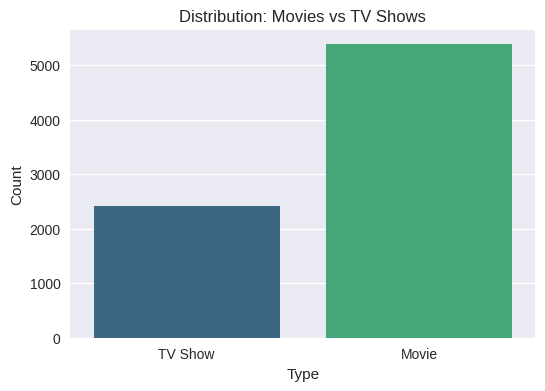

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Distribution: Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

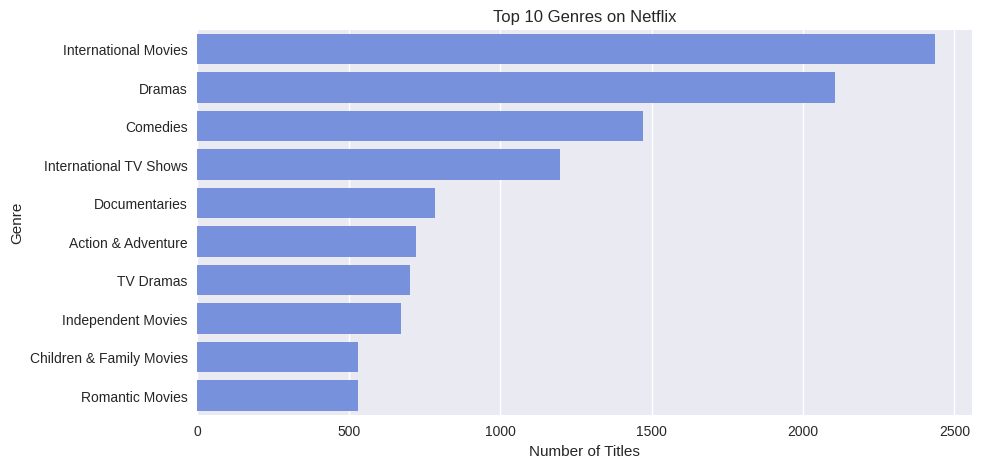

In [35]:
# Split and explode genre list
genres = df['Type'].dropna().str.split(',').explode().str.strip()

top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

px.bar(x=top_genres.index, y=top_genres.values, title='Top 10 Genres (Interactive)')

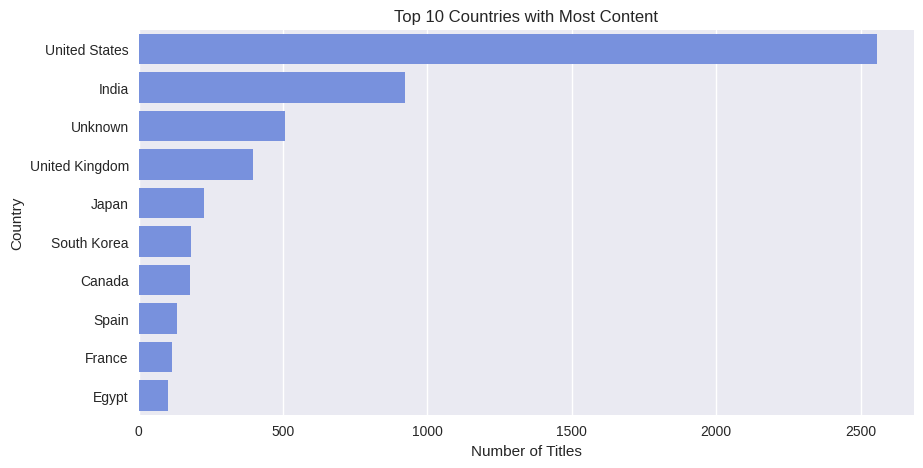

In [36]:
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

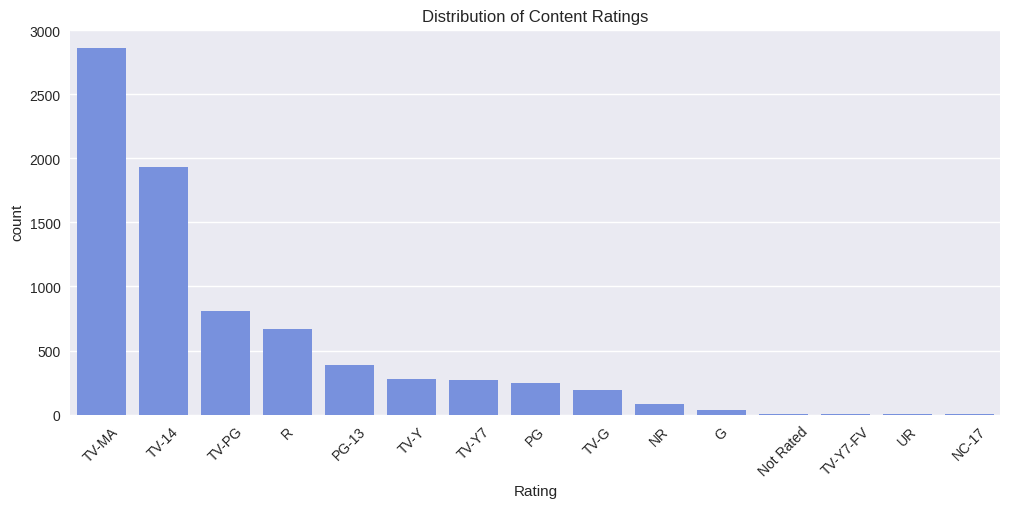

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index)
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Extract year from 'Release_Date'
df['year_added'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

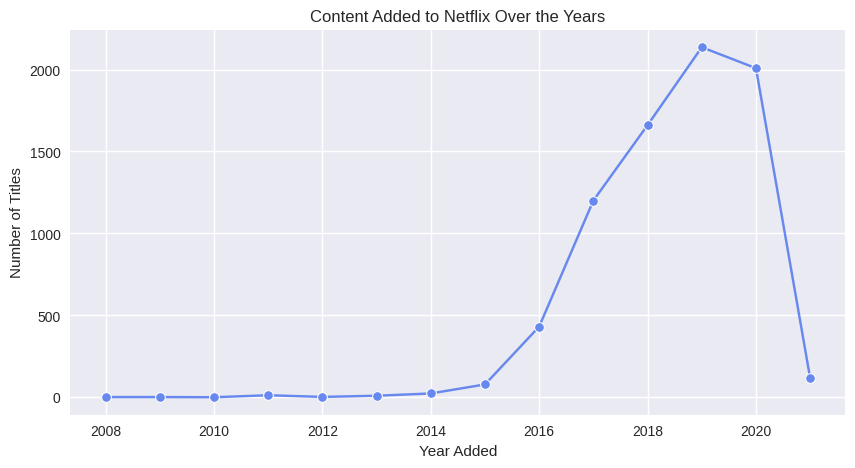

In [39]:
yearly_content = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

# Task
Generate a world map visualization of content distribution by country using Plotly Express.

## Aggregate data by country

### Subtask:
Count the number of titles for each country.


**Reasoning**:
Count the occurrences of each country in the 'Country' column and store the result in a DataFrame.



In [40]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
display(country_counts.head())

,Country,Count
0,United States,2555
1,India,923
2,Unknown,507
3,United Kingdom,397
4,Japan,226


## Prepare data for plotly

### Subtask:
Ensure the country names are in a format suitable for Plotly's world map.


**Reasoning**:
Examine the 'Country' column in the `country_counts` DataFrame to identify any country names that might not be recognized by Plotly Express for mapping and handle 'Unknown' or combined country entries.



In [41]:
# Check unique country names in country_counts
print("Unique countries in country_counts:")
print(country_counts['Country'].unique())

# Handle 'Unknown' and combined country entries
# For simplicity, we will exclude 'Unknown' and entries with multiple countries for the world map visualization.
# Plotly Express can handle single country names directly.
country_counts_single = country_counts[~country_counts['Country'].str.contains(',', na=False)]
country_counts_single = country_counts_single[country_counts_single['Country'] != 'Unknown']

display(country_counts_single.head())

Unique countries in country_counts:
['United States' 'India' 'Unknown' 'United Kingdom' 'Japan' 'South Korea'
 'Canada' 'Spain' 'France' 'Egypt' 'Mexico' 'Turkey' 'Australia' 'Taiwan'
 'Brazil' 'Philippines' 'Nigeria' 'Indonesia'
 'United Kingdom, United States' 'Germany' 'United States, Canada' 'China'
 'Thailand' 'Hong Kong' 'Argentina' 'Canada, United States' 'Italy'
 'United States, United Kingdom' 'Colombia' 'France, Belgium'
 'South Africa' 'Singapore' 'Malaysia' 'Poland' 'Pakistan' 'Netherlands'
 'Russia' 'Hong Kong, China' 'Mexico, United States'
 'United States, France' 'Chile' 'Lebanon' 'China, Hong Kong' 'Denmark'
 'United States, Japan' 'United States, Germany' 'Israel'
 'United Arab Emirates' 'Norway' 'United States, Australia'
 'United States, Mexico' 'New Zealand' 'Ireland'
 'Australia, United States' 'Germany, United States' 'Sweden'
 'India, United States' 'Japan, United States' 'Belgium'
 'Argentina, Spain' 'United States, India' 'United States, China'
 'Saudi Arabia'

,Country,Count
0,United States,2555
1,India,923
3,United Kingdom,397
4,Japan,226
5,South Korea,183


## Generate world map visualization

### Subtask:
Generate a world map visualization using Plotly Express to display the number of titles per country based on the processed data.


**Reasoning**:
Generate a world map visualization using Plotly Express to display the number of titles per country based on the processed data.



In [42]:
fig = px.choropleth(country_counts_single,
                    locations='Country',
                    locationmode='country names',
                    color='Count',
                    title='Netflix Content Distribution by Country')
fig.show()

## Summary:

### Data Analysis Key Findings

*   The original dataset contained country entries that included multiple countries and 'Unknown' values, which were excluded for the purpose of creating a world map visualization.
*   After processing, the data was aggregated to show the count of titles for each single country.
*   A world map visualization was successfully generated, illustrating the distribution of Netflix content by country based on the processed data.

### Insights or Next Steps

*   The generated map provides a clear visual overview of which countries have the most Netflix content available in this dataset.
*   Further analysis could involve investigating the specific types of content available in countries with high title counts versus those with lower counts.
